# Sklearn
1. Main Python ML library
2. Has numerous features to assist on all steps of the pipeline

In [168]:
import root_pandas
import numpy as np

In [160]:
data = root_pandas.read_root("/notebooks/public_train_10000.root")
features = data[list(set(data.columns) - {"event_id", "target"})]
target = data["target"]

## KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [20]:
trainX, testX, trainY, testY = train_test_split(features, target, random_state=42)

In [31]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(trainX, trainY)
roc_auc_score(testY, knn_clf.predict_proba(testX)[:, 1])

0.62039587934568208

How will this compare to cross validation?

In [173]:
cv_scores = cross_val_score(
    KNeighborsClassifier(n_neighbors=1), features, target, scoring='roc_auc', n_jobs=4, cv=4)
print cv_scores

[ 0.62929012  0.61190728  0.6106668   0.61182106]


In [36]:
np.mean(cv_scores), np.std(cv_scores)

(0.61592131519412685, 0.0077340089103426265)

**Exercise 0**. How stable is validation using train_test_split compared to cross validation? Use different random seeds for train_test_split and plot the distribution of scores.

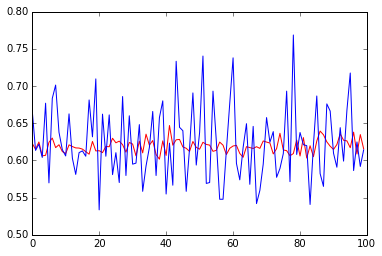

In [99]:
#Exercise 0
#seeds:
seeds = [i for i in range(100)]
tot_scores = []
tot_scores_cv = []
for i in seeds:
    trainX, testX, trainY, testY = train_test_split(features, target, random_state=i)
    knn_clf = KNeighborsClassifier(n_neighbors=1)
    knn_clf.fit(trainX, trainY)
    tot_scores.append(roc_auc_score(testY, knn_clf.predict_proba(testX)[:, 1]))
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=1), features, target, scoring='roc_auc', n_jobs=4, cv=100)
#print cv_scores
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(tot_scores, '-r')#in red
plt.plot(cv_scores, '-b')#in blue

In [60]:
def get_mean_cross_val_score(estimator, X, Y, *args, **kwargs):
    """Returns the mean cross validtion score and its standart deviation"""
    cv_scores = cross_val_score(estimator, X, Y, *args, **kwargs)
    return (np.mean(cv_scores), np.std(cv_scores))

Increasing the number of neighbours yields an improvement. 

In [61]:
get_mean_cross_val_score(KNeighborsClassifier(n_neighbors=10), features, target, scoring='roc_auc', n_jobs=4, cv=4)

(0.72285099723026269, 0.0066253468588189932)

In [88]:
#Exercise 1
metriche = ['euclidean','manhattan','chebyshev','minkowski']#'wminkowski','seuclidean', 'mahalanobis'
valori = {l: {} for a,l in enumerate(metriche)}
#for a in metriche:
#    valori.append(get_mean_cross_val_score(KNeighborsClassifier(n_neighbors=10, metric=a), features, target, scoring='roc_auc', n_jobs=4, cv=4))
for a in metriche:
    u=get_mean_cross_val_score(KNeighborsClassifier(n_neighbors=10, metric=str(a)), features, target, scoring='roc_auc', n_jobs=4, cv=4)
    #print a, u[0]
    valori[a]=u[0]
print valori

{'chebyshev': 0.70928708587662148, 'euclidean': 0.72285099723026269, 'manhattan': 0.72746332790870705, 'minkowski': 0.72285099723026269}


**Exercise 1.** Try different distance metrics for KNN 0 find the best one.

## Decision tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

One of the few advantages of the decision tree is its interpretability

In [167]:
tree = DecisionTreeClassifier(max_depth=3).fit(features, target)

**Exercise 2.** Plot cross validation score of a DecisionTreeClassifier as a function of max_depth.

max score:  0.707809270057
best n depths:  6


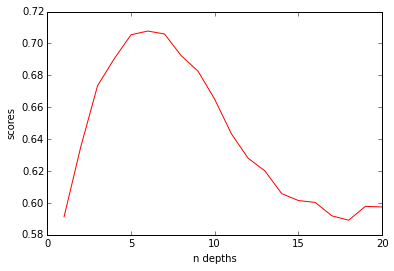

In [123]:
#Exercise 2
#print tree
depths = [a for a in range(1,21)]
scores = []
massimo_x = 0
massimo_y = 0
for i in depths:
    cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=i).fit(features, target), features, target, scoring='roc_auc', n_jobs=4, cv=10)
    scores.append(np.mean(cv_scores))
    if scores[i-1] > massimo_y:
#        print "aljdf"
        massimo_x = i
        massimo_y = scores[i-1]
print "max score: ", np.max(scores)
print "best n depths: ", massimo_x
#print scores
import matplotlib.pyplot as plt2
%matplotlib inline
plt2.plot(depths, scores, '-r')#in red
plt2.xlabel("n depths")
plt2.ylabel("scores")
###plt2.plot(cv_scores, '-b')#in blue

## Linear regression + Ridge regularization¶

In [150]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()
ridge_clf.fit(trainX, trainY)
print roc_auc_score(testY, ridge_clf.predict(testX))
print roc_auc_score(trainY, ridge_clf.predict(trainX))

0.625675911838
0.629631151303


**Exercise 3.** Plot how regularization parametera alpha of RidgeClassifier, affects quality on train and test.

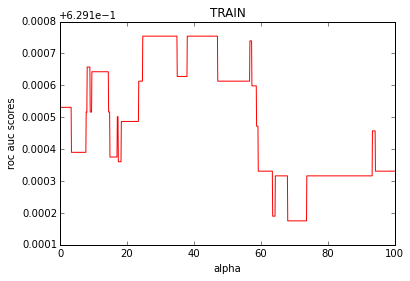

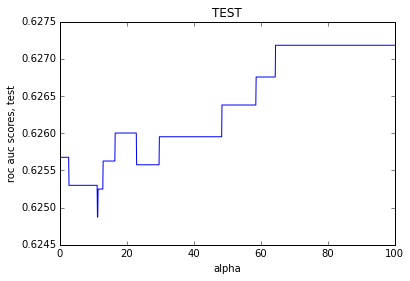

In [172]:
#Excercise 3
alfa = np.arange(0,100,0.1)
test_a = []
train_a = []
for a in alfa:
    ridge_a = RidgeClassifier(alpha=a).fit(trainX,trainY)
    #print a
    #print roc_auc_score(testY, ridge_a.predict(testX))
    test_a.append(roc_auc_score(testY, ridge_a.predict(testX)))
    train_a.append(roc_auc_score(trainY, ridge_a.predict(trainX)))

#print train_a
import matplotlib.pyplot as plt_a
%matplotlib inline
plt_a.plot(alfa, train_a, '-r')#in red
#plt_a.plot(alfa, test_a, '-r')#in blue
plt_a.xlabel("alpha")
plt_a.ylabel("roc auc scores")
plt_a.title("TRAIN")
plt_a.show()
import matplotlib.pyplot as plt_b
plt_b.plot(alfa, test_a, '-b')#in red
#plt_a.plot(alfa, test_a, '-r')#in blue
plt_b.xlabel("alpha")
plt_b.ylabel("roc auc scores, test")
plt_b.title("TEST")
plt_b.show()

**Exercise 4.** Find the most important features for Decision tree - use feature\_importances_ . Verify whether they make sense. Take first N features by importance, cross-validate the Decision tree, plot the dependance of the score on N. Alternative

In [157]:
#Excercise 4

Many thanks to Alexey and Tatiana for the materials inspiraiton.